In [1]:
%matplotlib inline
import random
import tensorflow as tf
from IPython import display
from matplotlib import pyplot as plt

In [2]:
def synthetic_data(w, b, num_examples):
    x = tf.zeros((num_examples, w.shape[0]))
    x += tf.random.normal(shape=x.shape)
    y = tf.matmul(x, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return x, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features:', features[0], '\nlabel:', labels[0])

features: tf.Tensor([ 1.0403026 -0.4590895], shape=(2,), dtype=float32) 
label: tf.Tensor([7.8294077], shape=(1,), dtype=float32)


In [4]:
def use_svg_display():
    display.set_matplotlib_formats('svg')


def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

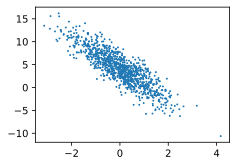

In [5]:
set_figsize()
plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1)

In [6]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

In [7]:
batch_size = 10
for x, y in data_iter(batch_size, features, labels):
    print(x, '\n', y)
    break

tf.Tensor(
[[ 0.05686088  0.933441  ]
 [-1.1037822  -0.47105125]
 [-0.69914806 -3.1329913 ]
 [ 0.70769644  1.8764423 ]
 [ 0.7854683  -0.67352515]
 [ 0.2057934  -1.2957053 ]
 [ 1.8273324  -0.26139373]
 [ 1.087674    0.48806348]
 [-0.9925123  -1.3169352 ]
 [ 0.34824607  0.86698914]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[ 1.152077 ]
 [ 3.5971649]
 [13.473397 ]
 [-0.762691 ]
 [ 8.051664 ]
 [ 9.001809 ]
 [ 8.749075 ]
 [ 4.7059374]
 [ 6.690089 ]
 [ 1.9681426]], shape=(10, 1), dtype=float32)


In [8]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01), 
               trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

In [9]:
def linreg(x, w, b):
    return tf.matmul(x, w) + b

In [10]:
def squared_loss(y_hat, y):
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

In [11]:
def sgd(params, grads, lr, batch_size):
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

In [12]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(x, w, b), y)
        dw, db = g.gradient(l, [w, b])
        sgd([w, b], [dw, db], lr, batch_size)
        train_l = loss(net(features, w, b), labels)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.045199
epoch 2, loss 0.000191
epoch 3, loss 0.000050


In [13]:
print(f'w的估计误差: {true_w - tf.reshape(w, true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: [ 0.00099087 -0.0003283 ]
b的估计误差: [2.0503998e-05]
